In [ ]:
zip_path = '/content/drive/My\ Drive/Deep_Learning/santa-dataset.zip'
!cp {zip_path} /content/
!cd /content/
!unzip -q /content/santa-dataset.zip -d /content
!rm /content/santa-dataset.zip

replace /content/santa-dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Deeper Model CNN

In [ ]:
np.random.seed(0)
#Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
deeper_model = Sequential()

deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300, 300, 3)))
deeper_model.add(MaxPooling2D((2, 2)))
deeper_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300, 300, 3)))
deeper_model.add(MaxPooling2D((2, 2)))
deeper_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300, 300, 3)))
deeper_model.add(MaxPooling2D((2, 2)))

deeper_model.add(Flatten())

deeper_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
deeper_model.add(Dropout(0.7))

deeper_model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)

deeper_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

deeper_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
dataset_dir = '/content/santa-dataset/'

train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(300, 300))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(300, 300))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
6/6 [==============================] - 23s 4s/step - loss: 14.2369 - accuracy: 0.4894 - val_loss: 0.4940 - val_accuracy: 0.8077
Epoch 2/100
6/6 [==============================] - 24s 4s/step - loss: 0.5796 - accuracy: 0.7613 - val_loss: 0.5541 - val_accuracy: 0.8577
Epoch 3/100
6/6 [==============================] - 21s 3s/step - loss: 0.4958 - accuracy: 0.8429 - val_loss: 0.4785 - val_accuracy: 0.8538
Epoch 4/100
6/6 [==============================] - 20s 3s/step - loss: 0.4648 - accuracy: 0.8353 - val_loss: 0.4219 - val_accuracy: 0.8808
Epoch 5/100
6/6 [==============================] - 20s 3s/step - loss: 0.3841 - accuracy: 0.8580 - val_loss: 0.4360 - val_accuracy: 0.8769
Epoch 6/100
6/6 [==============================] - 21s 4s/step - loss: 0.3641 - accuracy: 0.8912 - val_loss: 0.3911 - val_accuracy: 0.8769
Epoch 7/100
6/6 [==============================] - 20s 3s/step - loss: 0.3127 - accuracy:

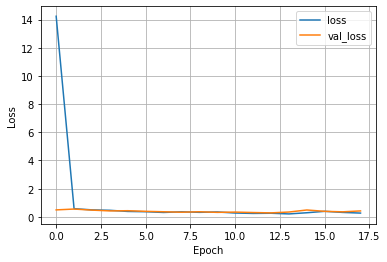

In [ ]:
es_callback = EarlyStopping(monitor='val_loss', patience=5)

history_augmented_dataset = deeper_model.fit_generator(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=100, callbacks=es_callback)
plot_loss(history_augmented_dataset)

# Kesimpulan
Overfitting pada percobaan sebelumnya diperbaiki dengan menambahkan layer dropout serta menggunakan early stopping. Plot grafik loss dan val_loss vs epoch sudah menunjukkan pengurangan overfitting dari model yang sebelumnya, tetapi nilai akurasi berkurang. Hasil terbaik diperoleh pada epoch ke-13 dengan val_loss 0.2881 serta val_accuracy 0.9115